<a href="https://colab.research.google.com/github/ugywjd/AI_12-HJ/blob/main/%08ai_12_%EB%B0%95%ED%9A%A8%EC%A0%95_section2_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Wine Quality Dataset**

Description:
데이터세트는 와인에 존재하는 다양한 화학 물질의 양과 와인 품질에 미치는 영향을 설명합니다. 

데이터 세트는 분류 또는 회귀 작업으로 시행할 수 있습니다. 

클래스는 순서가 있고 균형이 맞지 않습니다(예: 우수하거나 불량한 와인보다 일반 와인이 훨씬 더 많습니다.

주어진 데이터를 사용하여 와인의 품질을 예측하는 것입니다.



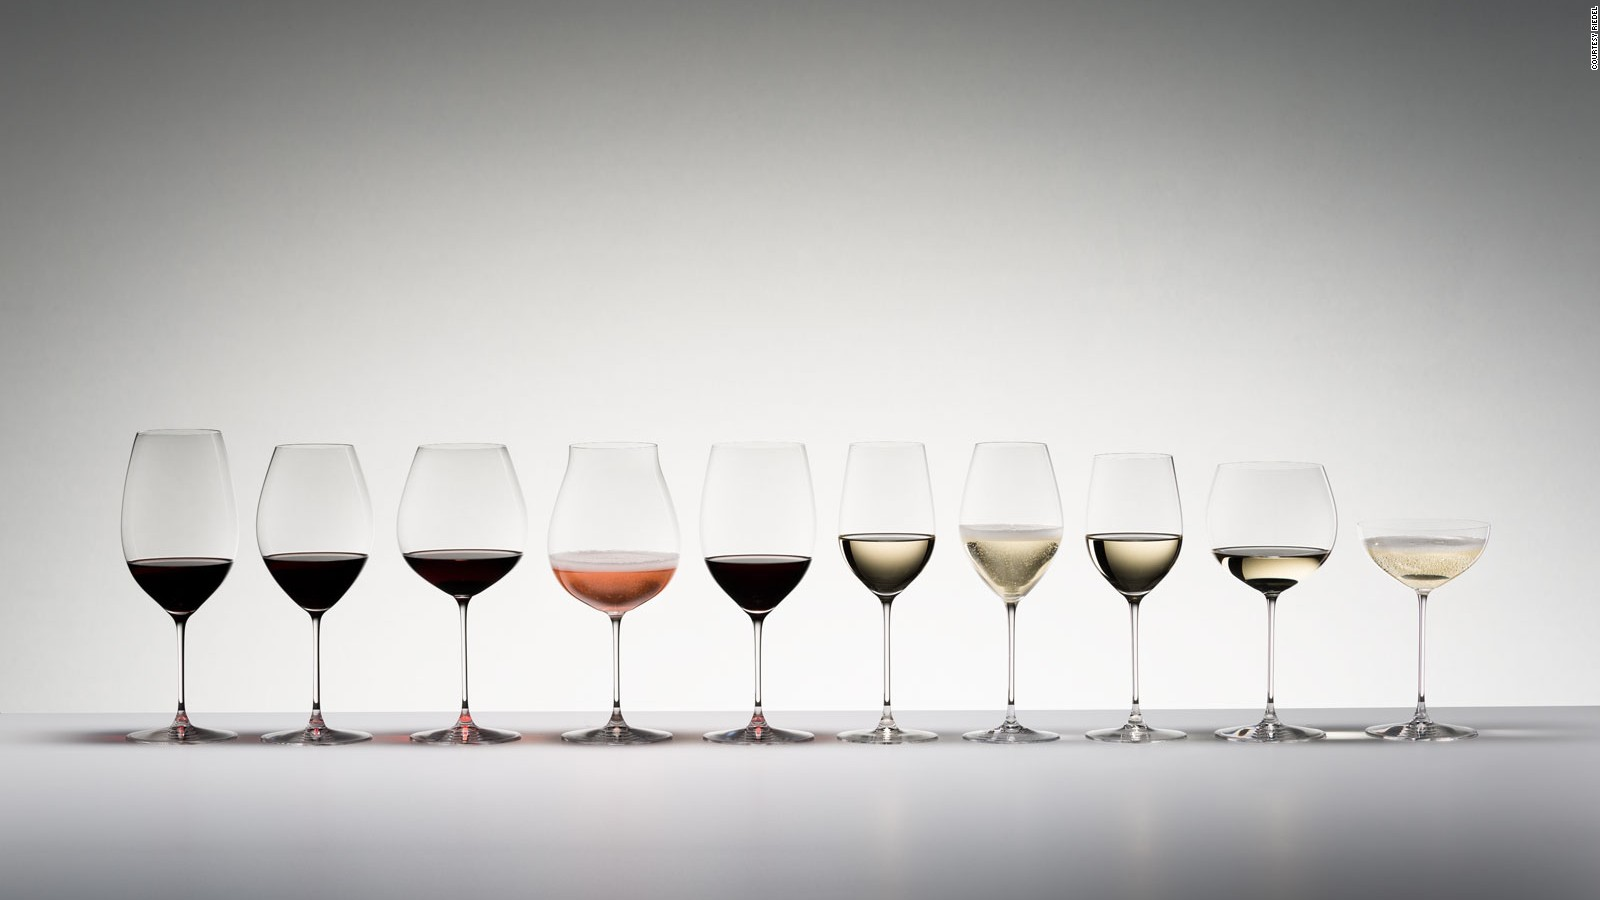



This data frame contains the following columns:

Input variables (based on physicochemical tests):\
1 - fixed acidity\

2 - volatile acidity\ 휘발성 산도

3 - citric acid\ 구연산

4 - residual sugar\ 잔여 설탕

5 - chlorides\ 염화물

6 - free sulfur dioxide\

7 - total sulfur dioxide\ 총 이산화황

8 - density\ 밀도

9 - pH\

10 - sulphates\ 황산염

11 - alcohol\Output variable (based on sensory data):\
        알코올\출력 변수(감각 데이터 기반):

12 - quality (score between 0 and 10) 품질(0에서 10 사이의 점수)

가설 : 화학물질의 양에 따른 와인 품질에 영향이 있을것이다! 

평가지표 중 하나인 정확도를 사용해 모델이 잘 예측되었는지?

In [1]:
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier


In [2]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['WineQT.csv']), encoding = 'euc-kr')

Saving WineQT.csv to WineQT (16).csv


In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [4]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [7]:
average_quality=df.groupby("quality").mean()
average_quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
quality,,,,,,,,,,,,
3,8.450000,0.897500,0.211667,2.666667,0.105333,8.166667,24.500000,0.997682,3.361667,0.550000,9.691667,1121.166667
4,7.809091,0.700000,0.165758,2.566667,0.094788,14.848485,40.606061,0.996669,3.391212,0.637879,10.260606,692.848485
5,8.161077,0.585280,0.240124,2.540476,0.091770,16.612836,55.299172,0.997073,3.302091,0.613375,9.902277,753.925466
6,8.317749,0.504957,0.263680,2.444805,0.085281,15.215368,39.941558,0.996610,3.323788,0.676537,10.655339,854.625541
7,8.851049,0.393671,0.386573,2.760140,0.075217,14.538462,37.489510,0.996071,3.287133,0.743566,11.482634,830.349650
8,8.806250,0.410000,0.432500,2.643750,0.070187,11.062500,29.375000,0.995553,3.240625,0.766250,11.937500,797.875000


In [8]:
def ft_viz(feature): #분포가 정상인지 확인하고 이상치 수 확인
    plt.figure(figsize=(10,5)) 
    plt.title(f'{feature} box plot')
    sns.boxplot(df[feature])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

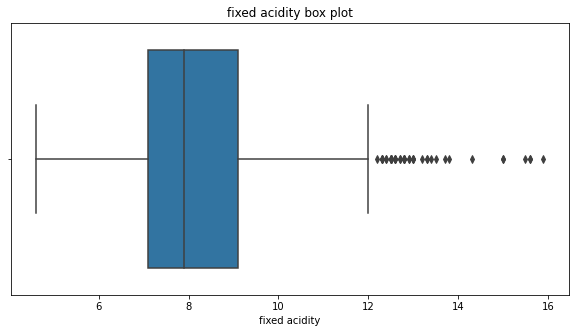

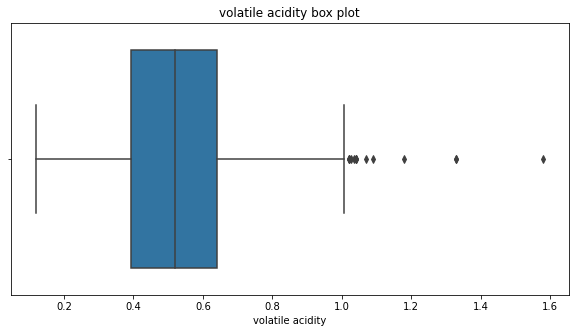

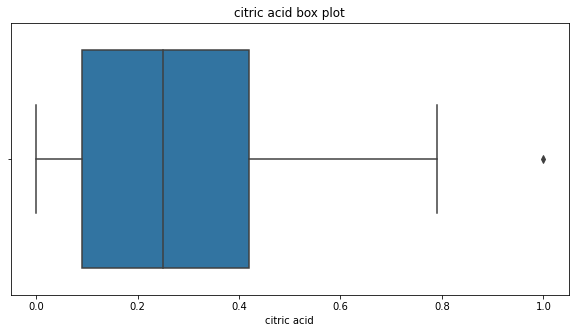

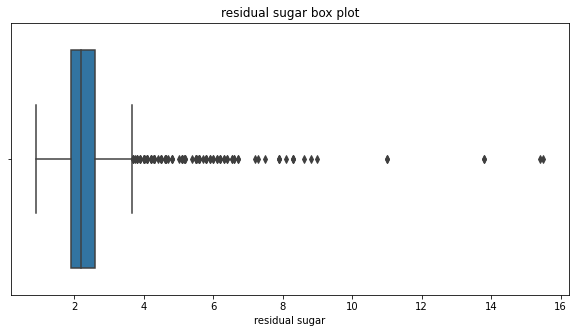

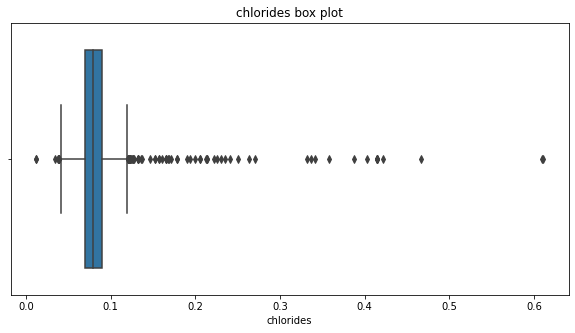

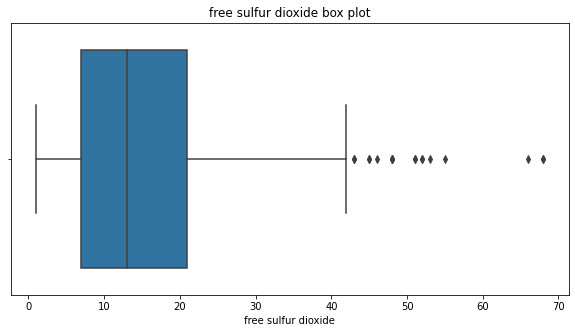

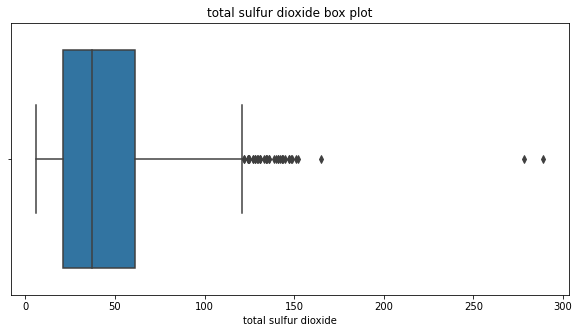

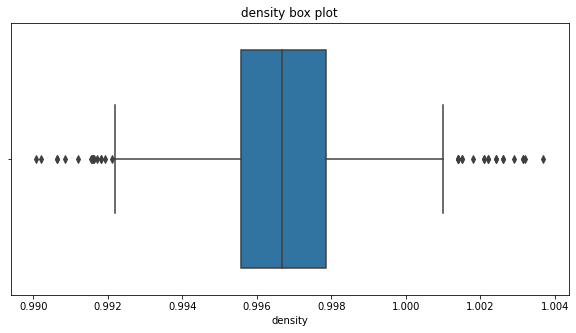

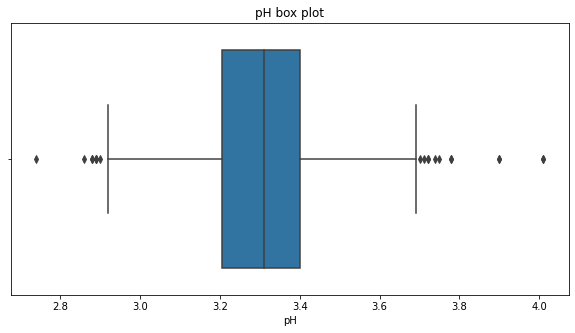

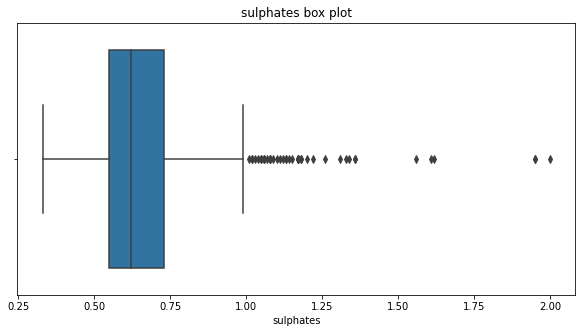

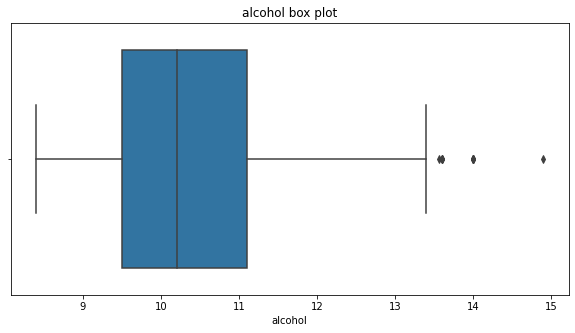

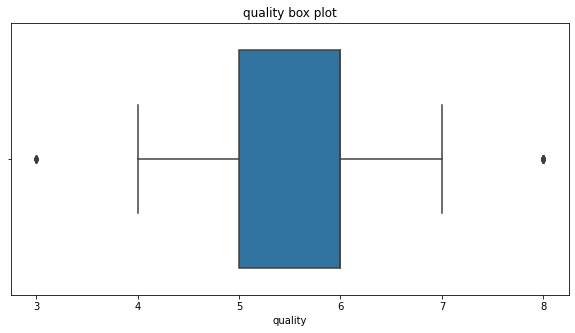

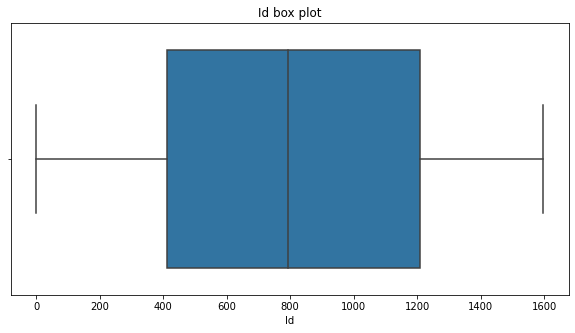

In [9]:
for i in df.columns:
    ft_viz(i)

일부 특성에는 이상값이 있으므로 로그 변환을 사용하여 정규화를 통해 기계가 학습할 때 용이할 수 있도록 

데이터셋에 있는 모든 특성들이 와인 품질에 영향을 미치지는 않을 겁니다

그래서 품질과 특성들간의 관계성을 살펴보고 그중 상위 5개의 특성만 정규화를 하도록 하겠습니다

<AxesSubplot:>

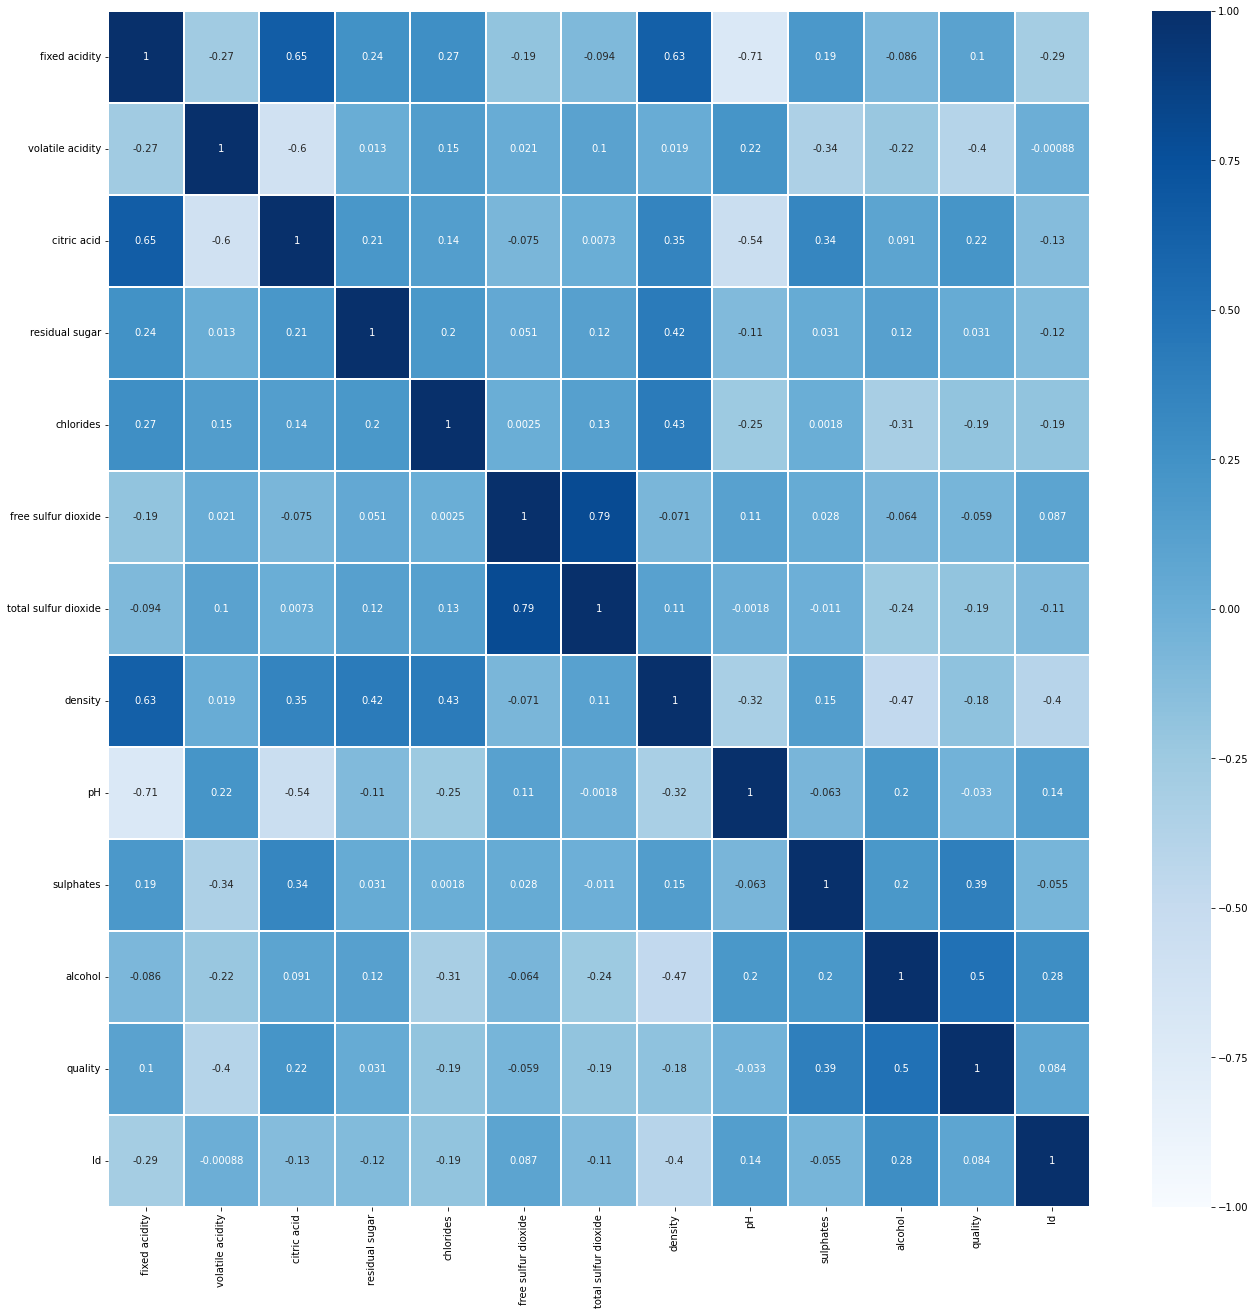

In [10]:
df_corr = df.corr(method="spearman")
plt.figure(figsize=(22,22))
sns.heatmap(df_corr, vmin=-1, vmax=1, cmap="Blues", annot=True, linewidth=0.1)

<AxesSubplot:>

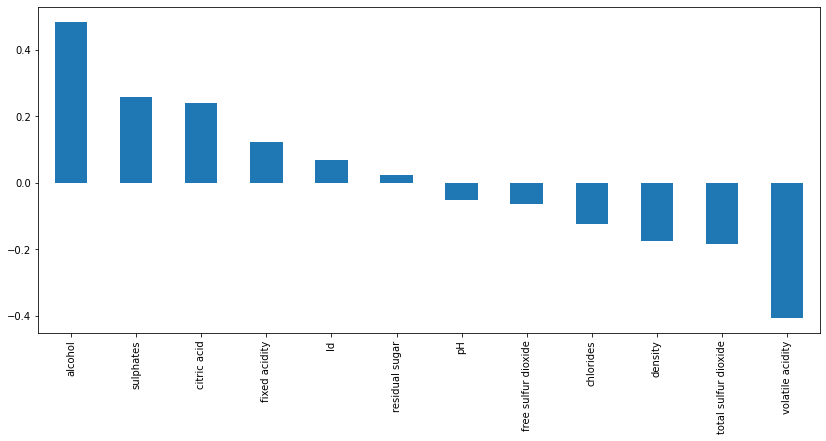

In [11]:
plt.figure(figsize=(14,6))
corr = df.corr()['quality'].sort_values(ascending=False)
corr.drop('quality').plot(kind='bar') #'quality','free sulfur dioxide', 'pH', 'residual sugar'은 상관관계가 낮으므로 생략하고 나머지 특성에 대해서는 로그 변환을 취하겠습니다.

In [12]:
x = x = np.log1p(df.drop(['quality','free sulfur dioxide', 'pH', 'residual sugar'], axis=1))
y = df['quality']

*데이터를* 훈련/검증/테스트 데이터로 분리합니다.

In [14]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size=0.2, stratify=y_train,
                                                  random_state=42)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

In [15]:
x_train.shape, x_val.shape, x_test.shape

((731, 9), (183, 9), (229, 9))

In [16]:
rs = RobustScaler()
x_train = rs.fit_transform(x_train)
x_test = rs.transform(x_test)

로지스틱 회귀 모델

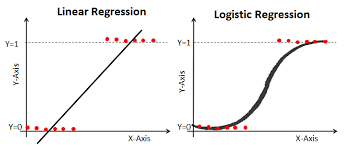

In [17]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_train)
lr_val = lr.predict(x_val)
lr_acc = lr.score(x_test, y_test)

print("Training accuracy for Logistic Regression: ", lr.score(x_train, y_train)*100, "%")
print("validation accuracy for Logistic Regression: ", lr.score(x_val, y_val)*100, "%")
print("Testing accuracy for Logistic Regression:", lr_acc*100, "%")

Training accuracy for Logistic Regression:  59.78112175102599 %
validation accuracy for Logistic Regression:  39.89071038251366 %
Testing accuracy for Logistic Regression: 64.62882096069869 %


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


결정트리 모델


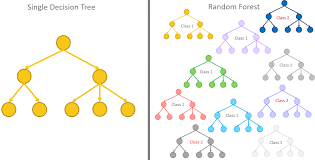

In [18]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc_pred = dtc.predict(x_test)
dtc_val = dtc.predict(x_val)
dtc_acc = dtc.score(x_test, y_test)

print("The training accuracy for decision tree classifier is:", dtc.score(x_train, y_train)*100, "%")
print("validation accuracy for decision tree classifier is: ", dtc.score(x_val, y_val)*100, "%")
print("The testing accuracy for decision tree classifier is:", dtc_acc * 100, "%")

The training accuracy for decision tree classifier is: 100.0 %
validation accuracy for decision tree classifier is:  42.62295081967213 %
The testing accuracy for decision tree classifier is: 53.275109170305676 %


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


랜덤포레스트 모델


In [19]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)
rfc_val = rfc.predict(x_val)
rfc_acc = rfc.score(x_test, y_test)

print("The training accuracy for Random Forest is:", rfc.score(x_train, y_train)*100, "%")
print("validation accuracy for Random Forest is: ", rfc.score(x_val, y_val)*100, "%")
print("The testing accuracy for Random Forest is:", rfc_acc * 100, "%")

The training accuracy for Random Forest is: 100.0 %
validation accuracy for Random Forest is:  42.62295081967213 %
The testing accuracy for Random Forest is: 67.68558951965066 %


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


그래디언트 부스팅 모델

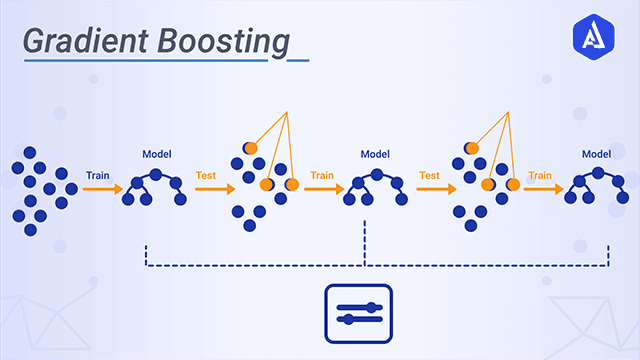

In [20]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
gbc_pred = gbc.predict(x_test)
gbc_val = gbc.predict(x_val)
gbc_acc = gbc.score(x_test, y_test)

print("The training accuracy for gradient boosting classifier is:", gbc.score(x_train, y_train)*100, "%")
print("validation accuracy for gradient boosting classifier is: ", gbc.score(x_val, y_val)*100, "%")
print("The testing accuracy for gradient boosting classifer is:", gbc_acc * 100, "%")

The training accuracy for gradient boosting classifier is: 93.98084815321477 %
validation accuracy for gradient boosting classifier is:  42.07650273224044 %
The testing accuracy for gradient boosting classifer is: 66.8122270742358 %


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [44]:
models = {'Logistic': lr_acc, 'Decision Tree': dtc_acc, 'Random Forest': rfc_acc, 
         'Gradient Boosting': gbc_acc, 
         }
m_df = pd.DataFrame(pd.Series(models))
m_df.columns = ['Scores']

m_df['Name'] = ['Logistic','Decision Tree', 'Random Forest', 'Gradient Boosting']


m_df

,Scores,Name
Logistic,0.646288,Logistic
Decision Tree,0.532751,Decision Tree
Random Forest,0.676856,Random Forest
Gradient Boosting,0.668122,Gradient Boosting


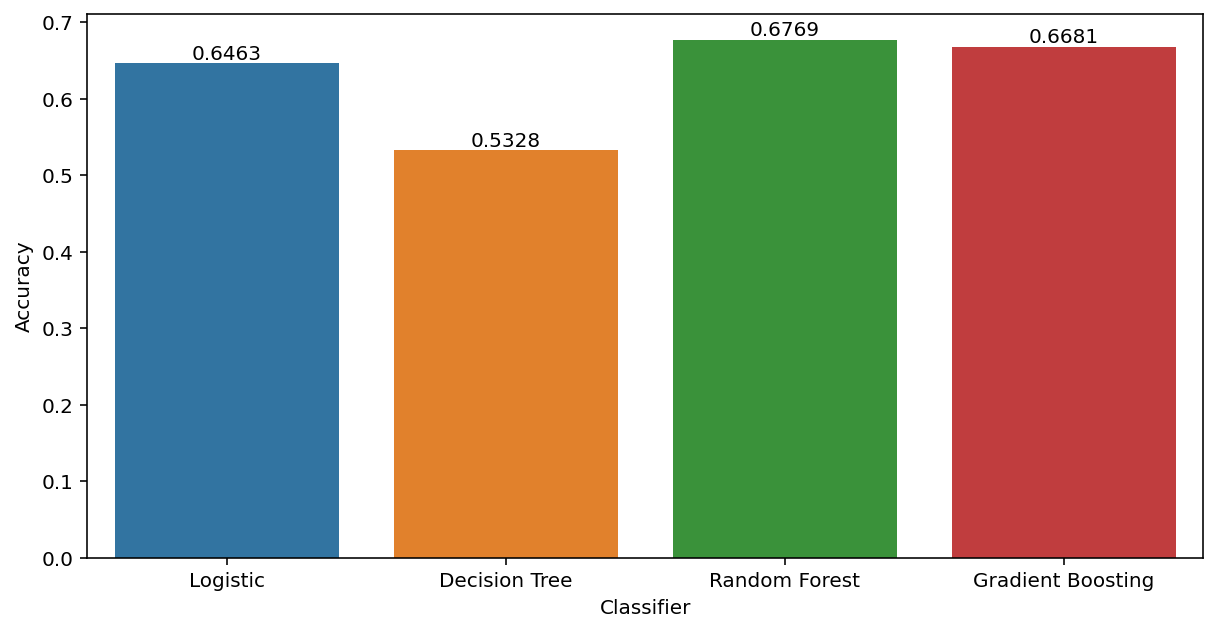

In [46]:
plt.figure(figsize=[10, 5])
axis = sns.barplot(x ='Name', y = 'Scores', data = m_df)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 

In [ ]:
pip install --upgrade category_encoders

In [ ]:
!pip install --upgrade matplotlib

In [ ]:
!pip install matplotlib-venn

In [24]:
!apt-get -qq install -y libfluidsynth1

In [25]:
from category_encoders import OneHotEncoder
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# (참고) warning 제거를 위한 코드
np.seterr(divide='ignore', invalid='ignore')

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='mean'), 
    StandardScaler(), 
    SelectKBest(f_regression, k=20),
    Ridge(alpha=1.0)
)

# 5-fold 교차검증을 수행합니다.
k = 5
scores = cross_val_score(pipe, x_train, y_train, cv=k, 
                         scoring='neg_mean_absolute_error')

print(f'MAE ({k} folds):', -scores)

MAE (5 folds): [nan nan nan nan nan]


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self.

In [26]:
from category_encoders import TargetEncoder
from sklearn.ensemble import RandomForestRegressor

pipe = make_pipeline(
    # TargetEncoder: 범주형 변수 인코더로, 타겟값을 특성의 범주별로 평균내어 그 값으로 인코딩
    TargetEncoder(min_samples_leaf=1, smoothing=1), 
    SimpleImputer(strategy='median'), 
    RandomForestRegressor(max_depth = 10, n_jobs=-1, random_state=2)
)

k = 3

scores = cross_val_score(pipe, x_train, y_train, cv=k, 
                         scoring='neg_mean_absolute_error')

print(f'MAE for {k} folds:', -scores)

MAE for 3 folds: [0.47595643 0.47305019 0.48038495]


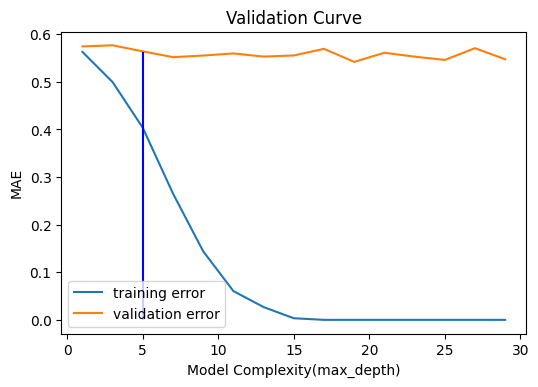

In [27]:
import matplotlib.pyplot as plt
from category_encoders import OrdinalEncoder
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeRegressor

pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    DecisionTreeRegressor()
)

depth = range(1, 30, 2)
ts, vs = validation_curve(
    pipe, x_train, y_train
    , param_name='decisiontreeregressor__max_depth'
    , param_range=depth, scoring='neg_mean_absolute_error'
    , cv=3
    , n_jobs=-1
)

train_scores_mean = np.mean(-ts, axis=1)
validation_scores_mean = np.mean(-vs, axis=1)

fig, ax = plt.subplots()

# 훈련세트 검증곡선
ax.plot(depth, train_scores_mean, label='training error')

# 검증세트 검증곡선
ax.plot(depth, validation_scores_mean, label='validation error')

# 이상적인 max_depth
ax.vlines(5,0, train_scores_mean.max(), color='blue')

# 그래프 셋팅
ax.set(title='Validation Curve'
      , xlabel='Model Complexity(max_depth)', ylabel='MAE')
ax.legend()
fig.dpi = 100

이대로 트리의 깊이를 정해야 한다면 max_depth = 5 부근에서 설정해 주어야 과적합을 막고 일반화 성능을 지킬 것 같습니다

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [31]:
%%capture

# Ignore this warning: https://github.com/dmlc/xgboost/issues/4300
# xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='xgboost')

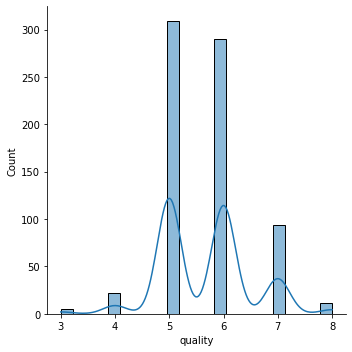

In [32]:
%matplotlib inline
import seaborn as sns
sns.displot(y_train, kde=True);

In [33]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 144